In [78]:
import seaborn as sns;
import pandas as pd;



## Task 1

### # 1
 For this assignment we are using seaborns "taxi" dataset. The data set describes the trips of New York taxi trips. 

In [112]:
#1 Find and download a dataset
taxiData = sns.load_dataset("taxis")
#2 Data Exploration
taxiData.describe() 

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


## # 2
The data set includes 14 features: 6 numerical, 2 times and 6 categorical. A quick example of the data set can be shown below. A quick summary of the data set can also be seen below by running .info().

In [140]:
#2 Data Exploration
taxiData.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [114]:
#2 Data Exploration
taxiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

###  #3
In this section we will cleaning the data set by removing any Nulls, NANs. We have also discovered that there are several data points with 0 passengers. We have decided to remove these data points as it makes no sense to have a paid trip with no passengers and it will skew our data. We are also removing trip with a distance of 0. We are afraid that these datapoints are mislabeled and will skew our dataset. 

There are several "payment" that are labeled as NANs, we have decided to replace all of these instances with the mode in that category which is "credit card". We finally remove all instances of NANs or Nulls by running dropna() on the dataframe.

In [142]:
#3 Data cleaning
print("Uncleaned dataset:",taxiData["total"].count())
# Drop all trips with 0 passengers
tripData = taxiData.drop(taxiData[ (taxiData['passengers'] == 0)].index)
print("Minimum of 1 passengers:",tripData["total"].count())
#Drop all trips with a distance = 0
tripData = tripData.drop(tripData[ (tripData['distance'] == 0)].index)
#Replace empty payment methods with credit card
tripData ["payment"] = tripData["payment"].fillna("credit card")
tripData = tripData.dropna()
print("Minimum 1 passenger and distance:",tripData["total"].count())
print("Cleaned total:", taxiData["total"].count() - tripData["total"].count())

Uncleaned dataset: 6433
Minimum of 1 passengers: 6337
Minimum 1 passenger and distance: 6252
Cleaned total: 181


In [121]:
tripData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6252 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6252 non-null   datetime64[ns]
 1   dropoff          6252 non-null   datetime64[ns]
 2   passengers       6252 non-null   int64         
 3   distance         6252 non-null   float64       
 4   fare             6252 non-null   float64       
 5   tip              6252 non-null   float64       
 6   tolls            6252 non-null   float64       
 7   total            6252 non-null   float64       
 8   color            6252 non-null   object        
 9   payment          6252 non-null   object        
 10  pickup_zone      6252 non-null   object        
 11  dropoff_zone     6252 non-null   object        
 12  pickup_borough   6252 non-null   object        
 13  dropoff_borough  6252 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), o

Looking at the data set now we can see we have 6252 rows left with no-null values. 

The next step in data cleaning is determining and removing outliers. To do this we sort the data according to distance, fare and tip.

In [143]:
#3 Data Cleaning - Outliers
tripData.sort_values('distance', ascending=False).head(5)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.0,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
2397,2019-03-21 18:56:59,2019-03-21 19:49:58,1,30.23,52.0,13.11,5.76,78.67,yellow,credit card,JFK Airport,Meatpacking/West Village West,Queens,Manhattan
1535,2019-03-09 18:57:53,2019-03-09 19:49:53,1,28.30,52.0,2.00,5.76,63.06,yellow,credit card,World Trade Center,JFK Airport,Manhattan,Queens
3875,2019-03-30 17:07:48,2019-03-30 18:10:46,6,28.15,52.0,12.46,9.50,74.76,yellow,credit card,Financial District North,JFK Airport,Manhattan,Queens
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.5,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


In [144]:
#3 Data Cleaning - outliers

tripData.sort_values('fare', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.00,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
5567,2019-03-07 00:28:57,2019-03-07 02:02:55,1,25.51,93.50,0.00,0.00,94.80,green,credit card,Sunset Park West,Saint Albans,Brooklyn,Queens
5827,2019-03-05 10:34:36,2019-03-05 11:44:01,1,20.64,86.14,0.00,5.76,92.40,green,credit card,Coney Island,Upper East Side North,Brooklyn,Manhattan
6053,2019-03-05 07:23:49,2019-03-05 09:11:29,1,22.17,81.86,0.00,0.00,82.36,green,credit card,University Heights/Morris Heights,Yorkville East,Bronx,Manhattan
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


In [145]:
#3 Data Cleaning - outliers
tripData.sort_values('tip', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn
2387,2019-03-28 15:58:52,2019-03-28 15:59:25,1,1.80,69.06,20.80,0.00,90.16,yellow,credit card,JFK Airport,JFK Airport,Queens,Queens
785,2019-03-15 15:10:03,2019-03-15 16:25:25,1,16.30,52.00,18.30,5.76,79.36,yellow,credit card,Murray Hill,JFK Airport,Manhattan,Queens
4267,2019-03-27 18:08:31,2019-03-27 19:01:45,1,16.77,52.00,16.39,5.76,81.95,yellow,credit card,JFK Airport,East Village,Queens,Manhattan
2122,2019-03-08 00:40:32,2019-03-08 01:11:53,1,15.51,44.00,16.27,17.28,81.35,yellow,credit card,TriBeCa/Civic Center,West Brighton,Manhattan,Staten Island


Looking at the table above, we have identified that Mr. Beast has driven in the datapoint: 2387, where he drove from jfk to jfk and paid a extraordinary large tip and fare for such short trip, (distance 1.8, fare 69$). We have determined that this is an outlier and will be removed as such.

In [147]:
#Remove outlier
tripData.drop(index = 2387, inplace = True)
# Run head to confirm outlier has been removed
tripData.sort_values('tip', ascending=False).head(5)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.5,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn
785,2019-03-15 15:10:03,2019-03-15 16:25:25,1,16.30,52.0,18.30,5.76,79.36,yellow,credit card,Murray Hill,JFK Airport,Manhattan,Queens
4267,2019-03-27 18:08:31,2019-03-27 19:01:45,1,16.77,52.0,16.39,5.76,81.95,yellow,credit card,JFK Airport,East Village,Queens,Manhattan
2122,2019-03-08 00:40:32,2019-03-08 01:11:53,1,15.51,44.0,16.27,17.28,81.35,yellow,credit card,TriBeCa/Civic Center,West Brighton,Manhattan,Staten Island
3890,2019-03-19 21:45:39,2019-03-19 22:31:00,1,18.52,52.0,15.26,5.76,76.32,yellow,credit card,JFK Airport,Midtown North,Queens,Manhattan


### #4
In this part We want to visualize the data. We will be drawing scatter plots, using seaborn, the distances traveled vs fares and distances vs tips. 

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\2492151631.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timeData['pickup'] = pd.to_datetime(timeData['pickup'].dt.strftime('%H:%M'))


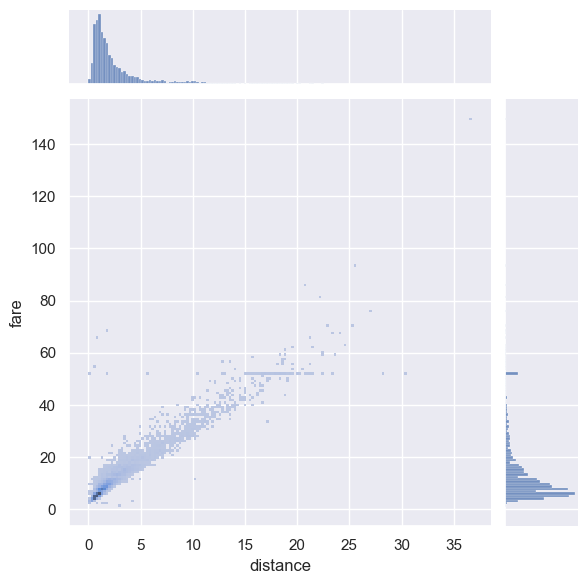

In [88]:
#4 Visualization
timeData = tripData
timeData['pickup'] = pd.to_datetime(timeData['pickup'].dt.strftime('%H:%M'))
sns.jointplot(data=timeData,x="distance", y="fare", kind="hist")

Above we can see a linear correlation between distance and fares. This is what is to be expected as fares are based on the distance traveled and the trip time. We can also see that the distribution is concentrated on the lower ranges: fare 1-10 and distance 0-5. 

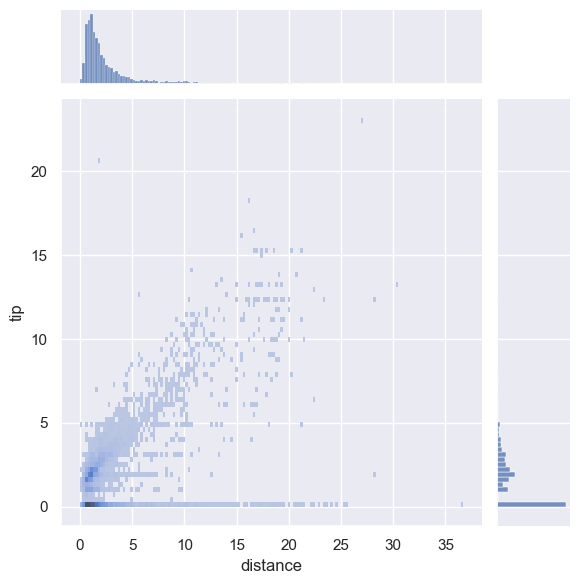

In [89]:
sns.jointplot(data=timeData,x="distance", y="tip", kind="hist")

Above we have plotted distance vs tips. We had a hypothetical that distance will correlate with tips. For some part that is true however there is a large concentration of people who tip 0$ even on longer trips.

## Task 2

This task focus on feature engineering and explaining distribution of features. 

As there are stories we can tell with tips, we have decided to bin then into 4 different bins with the ranges [:,0],[0,3], [3,8] and [8,:]. We wanted to keep 0, as its own bin as a lot of passengers give no tips. The ranges [0,3] and [3,8] are set so that we could have a somewhat even distribution inbetween them.

In [152]:
#1 Feature Engineering - Binning
# Define bins
bins = [-1,0,3,8,100]

tripData["tip_bin"] = pd.cut(tripData["tip"],bins)

tripData.head(99999999999)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_bin
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,"(0, 3]"
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,"(-1, 0]"
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,"(0, 3]"
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,"(3, 8]"
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,"(0, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,"(0, 3]"
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,"(-1, 0]"
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,"(-1, 0]"
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,"(-1, 0]"


In [153]:
# Print the sizes of each bin
print(tripData.groupby("tip_bin").size())

tip_bin
(-1, 0]     2235
(0, 3]      2710
(3, 8]      1114
(8, 100]     192
dtype: int64


C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\1731128258.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tripData.groupby("tip_bin").size())


The next section will involve one hot encoding. This involves taking a categorical feature, and turning its classes into its own colomn. This can be done easily using the pandas library's get_dummies() function.

In [151]:
#1 Feature Engineering - One hot encoding

one_hot_dropoff_zone = pd.get_dummies(tripData["dropoff_zone"])

one_hot_dropoff_zone.head(10)

,Allerton/Pelham Gardens,Alphabet City,Astoria,Auburndale,Baisley Park,Bath Beach,Battery Park,Battery Park City,Bay Ridge,Bayside,...,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodhaven,Woodlawn/Wakefield,Woodside,World Trade Center,Yorkville East,Yorkville West
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
#1 Feature Engineering - One hot encoding

one_hot_pickup_zone = pd.get_dummies(tripData["pickup_zone"])

one_hot_pickup_zone.head(10)

,Allerton/Pelham Gardens,Alphabet City,Astoria,Auburndale,Battery Park,Battery Park City,Bay Ridge,Bayside,Bedford,Bedford Park,...,Whitestone,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodlawn/Wakefield,Woodside,World Trade Center,Yorkville East,Yorkville West
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Looking at the one hot encoding above we can see that there has been made 203 and 192 colomns from the features "pickup_zone" and "dropoff_zone". This may seem quite aggressive but the point isn't for it to be legible for humans, but by converting categories into binaries it makes it usable for machine learning algorithms. 

### # 2

The mean, median and standard deviation can be quickly calculated using the describe() function on a dataframe.

In [133]:
# 2. Descriptive Statistics

tripData.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6252,6252,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000
mean,2019-03-16 08:22:43.423064320,2019-03-16 08:37:05.918266368,1.566219,3.011766,12.875187,1.956750,0.309623,18.279819
min,2019-02-28 23:29:03,2019-02-28 23:32:35,1.000000,0.010000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:06:19.249999872,2019-03-08 15:47:37.500000,1.000000,1.000000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:43:15.500000,2019-03-15 22:02:12.500000,1.000000,1.660000,9.500000,1.700000,0.000000,14.160000
75%,2019-03-23 17:15:03.750000128,2019-03-23 17:29:17,2.000000,3.220000,15.000000,2.760000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.201209,3.722938,10.656627,2.346348,1.358912,12.853383


#### Count
- Total Records: 6,252

#### Pickup and Dropoff Dates/Times
- Mean: Mid-March for both pickup and dropoff times
- Range: From late February to early April

#### Passengers
- Average: Approximately 1.56 passengers per trip
- Mode: Is one passenger
#### Distance
- Average: 3.01 miles per trip
- Std: 3.72 miles, indicating moderate variability in trip lengths
#### Fare
- Average: 12.87 per trip
- Std: 10.66, showing a wide range in fares

#### Tip
- Average: 1.96 per trip
- Std: 2.35, suggesting variable tipping behavior

#### Tolls
- Average: 0.31 per trip
- Std: 1.36, indicating most trips do not have high toll fees, but there are exceptions

#### Total Charge
- Average: 18.28 per trip
- Std: 12.85, reflecting the wide range in total trip costs

In [157]:
# 2. Descriptive Statistics -Categories

print(tripData.groupby("payment").size())
print("___")
print(tripData.groupby("color").size())
print("___")
print(tripData.groupby("passengers").size())

payment
cash           1763
credit card    4488
dtype: int64
___
color
green      956
yellow    5295
dtype: int64
___
passengers
1    4606
2     867
3     240
4     110
5     277
6     151
dtype: int64


In [158]:
print(len(tripData["dropoff_zone"].unique()))

203


<Axes: xlabel='fare'>

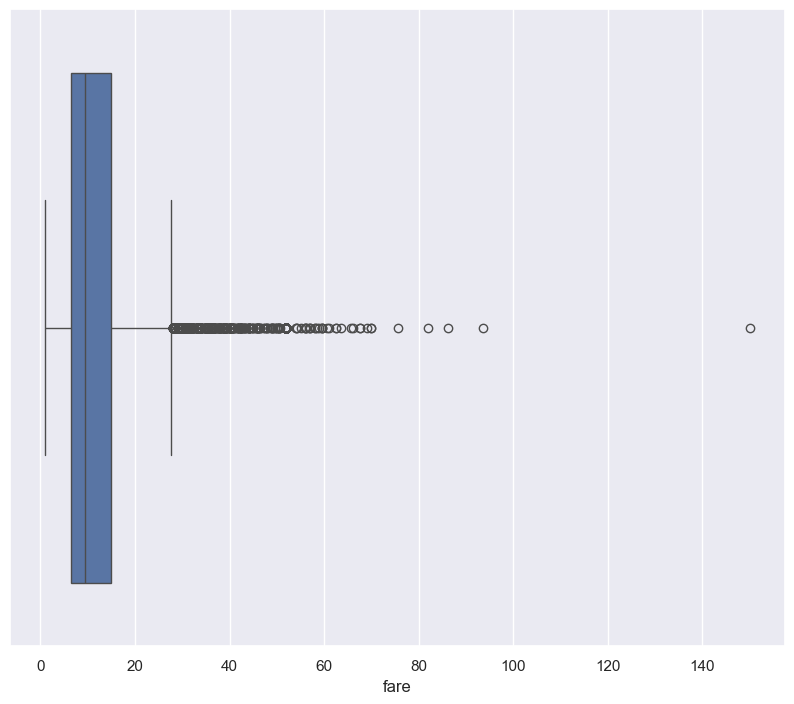

In [135]:
sns.boxplot(x=tripData["fare"])

### Boxplot - Fares

This boxplot illustrates the values of the "fare" column. It shows that the mean, indicated by the grey line in the middle, is around 10 (10 dollars per taxi ride). Shown by the grey vertial lines on each side of the box, is the minimum and maximum value of the dataset. The minimum values is just over 0 dollars, which makes sense since the 0 dollar rides has been removed in previous steps. The maximum value of the fares is right below 30 and the points beyond that are outliers that deviate from the general distribution of the data.
It could be argued that this boxplot indicates outliers that should be removed, but we have deemed them worthy of staying, due to the great amount of datapoints that are shown as outliers and removing those would mean a too great loss of data. The one data point on the far right is however too extreme to keep hold of and it's therefore removed in a later step.

<Axes: xlabel='distance'>

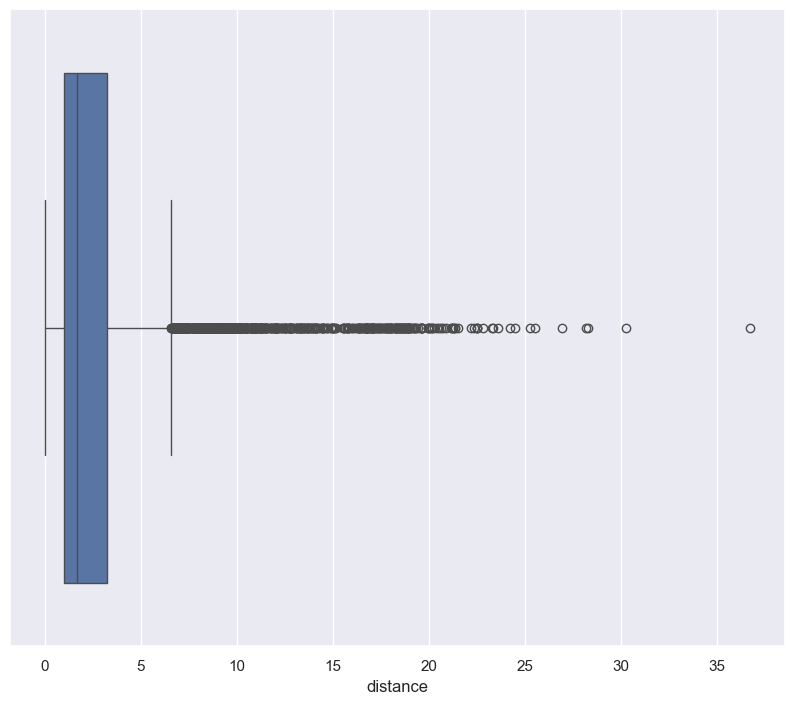

In [136]:
sns.boxplot(x=tripData["distance"])

### Boxplot - Distance traveled

This is a boxplot visulizing the values of the distance column. The mean of the data is around 2. This could be considered a low travel distance, but a reasonable value when taking into consideration that the majority of the rides are taking place in Manhatten, where small travel distances are common. There are here also a great deal of outlying datapoints and removing these would result in a loss of too much data.

<Axes: xlabel='tip'>

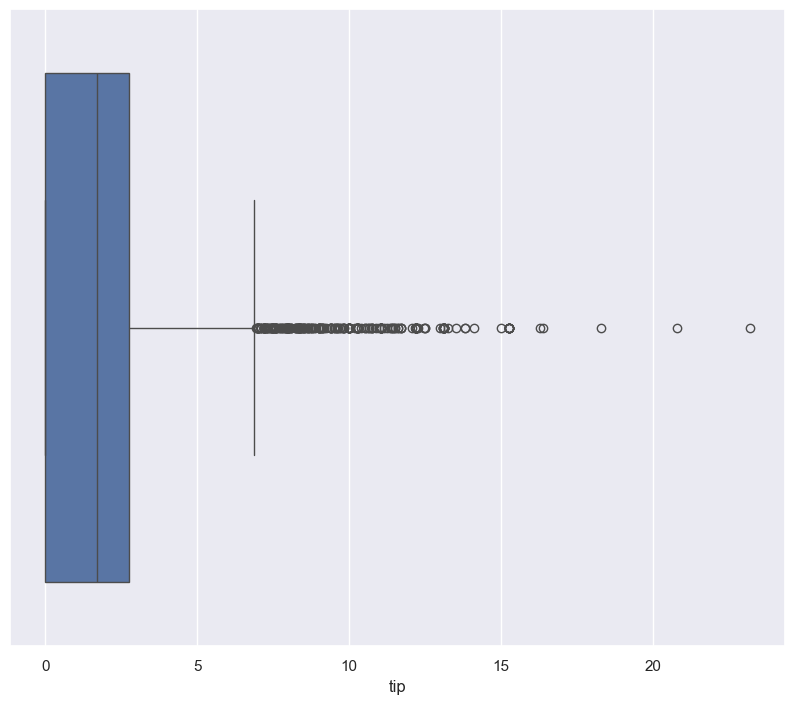

In [137]:
sns.boxplot(x=tripData["tip"])

### Boxplot - Tips per ride

This boxplot shows the distrubution of tips received per ride. The mimum value is zero with a lot of values being very close. The mean is only at about two, the maximum is about 7, while a few outliers reach all the way up to almost 25. The outliers in this boxplot are also in such great numbers that removing them isn't desireable.

In [138]:
# Remove the identified outlier by sorting by trip distance and remove the first element
tripData = tripData.sort_values('distance', ascending = False)
tripData = tripData.iloc[1:,:]

tripData.head(1000)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_bin
2397,2019-03-21 18:56:59,2019-03-21 19:49:58,1,30.23,52.0,13.11,5.76,78.67,yellow,credit card,JFK Airport,Meatpacking/West Village West,Queens,Manhattan,"(8, 100]"
1535,2019-03-09 18:57:53,2019-03-09 19:49:53,1,28.30,52.0,2.00,5.76,63.06,yellow,credit card,World Trade Center,JFK Airport,Manhattan,Queens,"(0, 3]"
3875,2019-03-30 17:07:48,2019-03-30 18:10:46,6,28.15,52.0,12.46,9.50,74.76,yellow,credit card,Financial District North,JFK Airport,Manhattan,Queens,"(8, 100]"
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.5,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn,"(8, 100]"
5567,2019-03-07 00:28:57,2019-03-07 02:02:55,1,25.51,93.5,0.00,0.00,94.80,green,credit card,Sunset Park West,Saint Albans,Brooklyn,Queens,"(-1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2019-03-22 07:13:46,2019-03-22 07:23:26,6,4.70,14.5,0.00,0.00,17.80,yellow,cash,Seaport,UN/Turtle Bay South,Manhattan,Manhattan,"(-1, 0]"
2618,2019-03-18 16:07:42,2019-03-18 16:24:25,1,4.70,16.5,0.00,0.00,20.80,yellow,credit card,Upper West Side South,Washington Heights South,Manhattan,Manhattan,"(-1, 0]"
2372,2019-03-31 02:19:19,2019-03-31 02:36:15,1,4.70,17.0,3.12,0.00,23.92,yellow,credit card,West Chelsea/Hudson Yards,East Harlem South,Manhattan,Manhattan,"(3, 8]"
556,2019-03-12 08:17:33,2019-03-12 08:38:51,1,4.70,18.5,4.35,0.00,26.15,yellow,credit card,Clinton East,Battery Park City,Manhattan,Manhattan,"(3, 8]"


<Axes: xlabel='distance'>

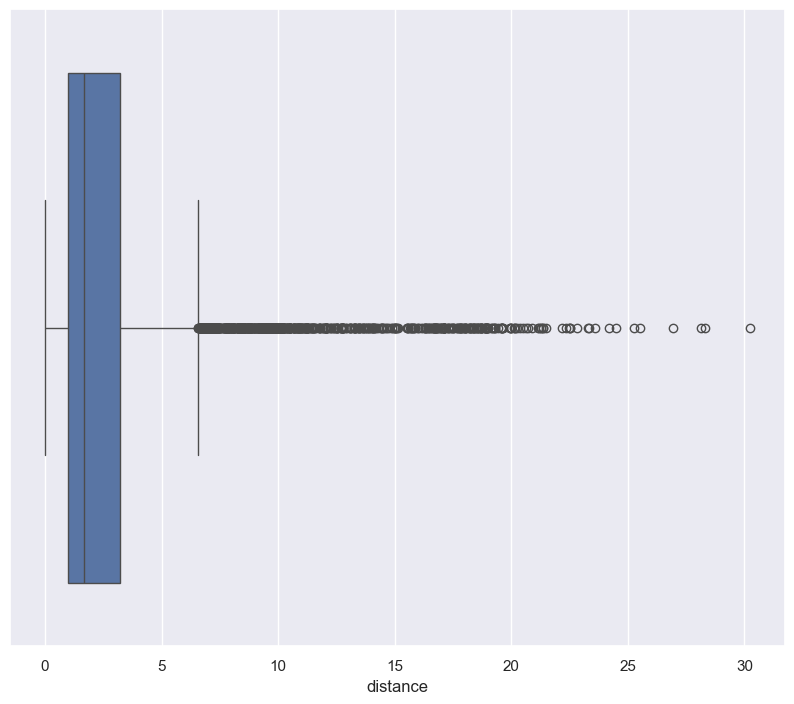

In [139]:
#Show box blop with no outliers
sns.boxplot(x=tripData["distance"])

### Boxplot - Distance travel (Removed outlier)

This is the boxplot illustrating the data for distance traveled like previously shown. This version however, has the extreme of 37 removed, giving a more accurate representation of the data.

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\973195956.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)


[Text(0, 0, '(0, 3]'),
 Text(1, 0, '(-1, 0]'),
 Text(2, 0, '(3, 8]'),
 Text(3, 0, '(8, 100]')]

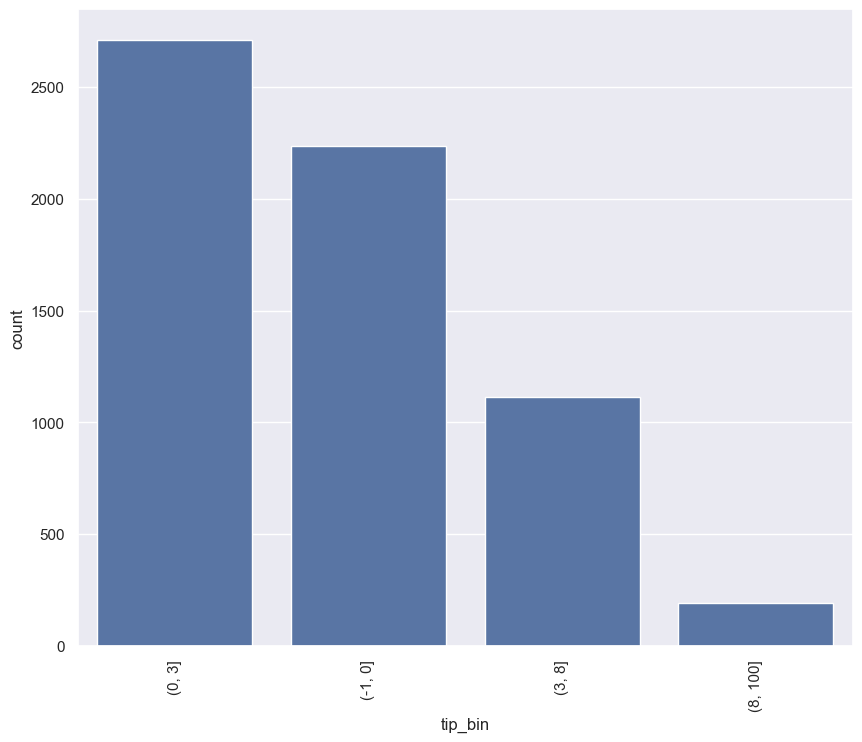

In [101]:

sns.set(rc={'figure.figsize':(10,8.27)})
myplot = sns.countplot(data=tripData, x="tip_bin", order=tripData['tip_bin'].value_counts().iloc[:203].index )
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\3862557515.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Queens'),
 Text(2, 0, 'Brooklyn'),
 Text(3, 0, 'Bronx'),
 Text(4, 0, 'Staten Island')]

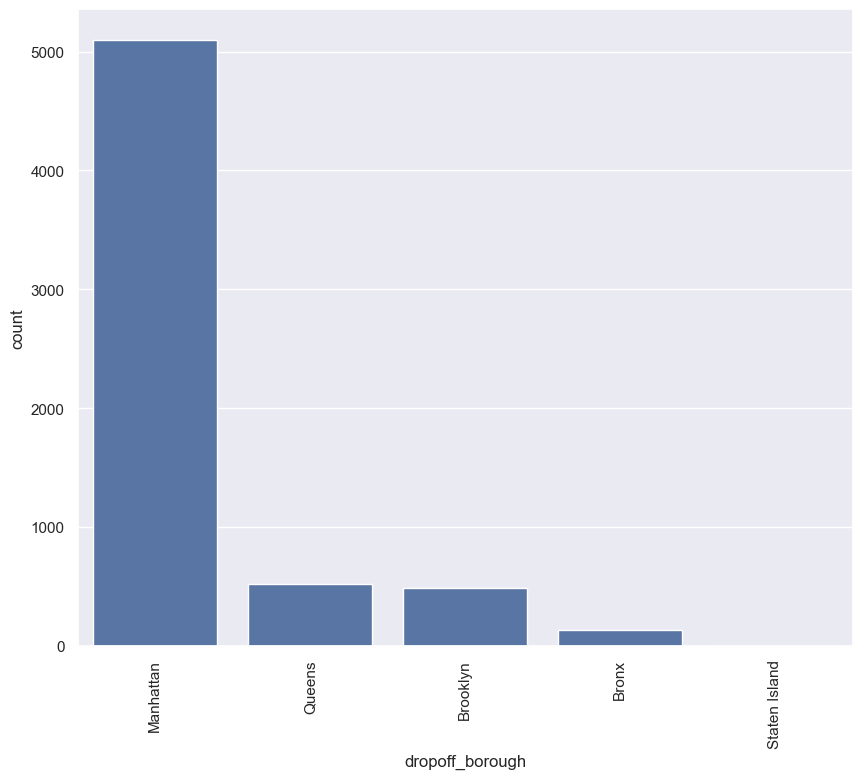

In [102]:
sns.set(rc={'figure.figsize':(10,8.27)})
myplot = sns.countplot(data=tripData, x="dropoff_borough", order=tripData['dropoff_borough'].value_counts().iloc[:203].index )
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\2381427274.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Queens'),
 Text(2, 0, 'Brooklyn'),
 Text(3, 0, 'Bronx')]

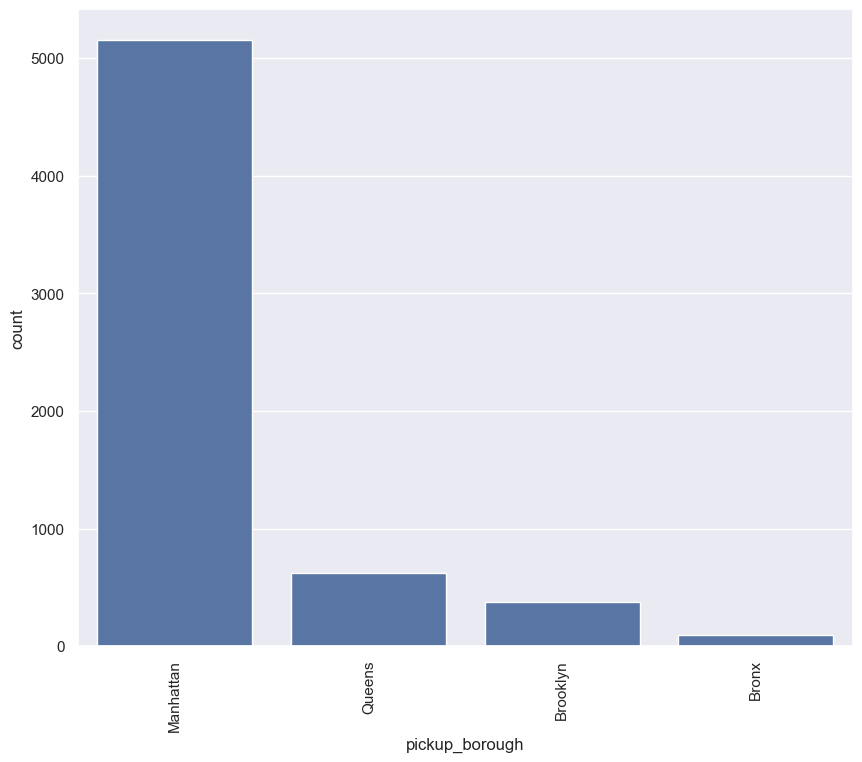

In [103]:
sns.set(rc={'figure.figsize':(10,8.27)})
myplot = sns.countplot(data=tripData, x="pickup_borough", order=tripData["pickup_borough"].value_counts().iloc[:203].index )
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

# Task 3

In this section we will be looking at rides in Manhattan and Bronx. As Manhattan is generally speaking the wealthiest borough and Bronx is the poorest. With the assumption that the tips will be higher on rides to and from Manhattan.

In [104]:
mask = taxiData["pickup_borough"] == "Manhattan"
taxiData[mask].describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,5268,5268,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,2019-03-16 08:37:26.411541504,2019-03-16 08:50:14.002657536,1.566059,2.349723,11.152889,1.939550,0.142912,16.670507
min,2019-03-01 00:03:29,2019-03-01 00:13:32,0.000000,0.000000,2.500000,0.000000,0.000000,3.300000
25%,2019-03-08 17:05:59.249999872,2019-03-08 17:17:43.500000,1.000000,0.930000,6.000000,0.000000,0.000000,11.000000
50%,2019-03-15 20:29:32,2019-03-15 20:41:28.500000,1.000000,1.500000,8.500000,1.860000,0.000000,13.800000
75%,2019-03-23 16:07:18,2019-03-23 16:24:41,2.000000,2.630000,13.000000,2.800000,0.000000,18.960000
max,2019-03-31 23:15:03,2019-03-31 23:27:12,6.000000,28.300000,130.000000,20.560000,17.280000,136.560000
std,NaN,NaN,1.223621,2.668469,8.239970,2.023955,0.943482,10.079846


In [105]:
mask = taxiData["pickup_borough"] == "Bronx"
taxiData[mask].describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,99,99,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2019-03-16 16:10:03.353535232,2019-03-16 16:34:33.242424320,1.191919,5.725859,20.999091,0.148586,0.778182,22.765253
min,2019-03-01 08:23:18,2019-03-01 08:52:12,0.000000,0.000000,2.500000,0.000000,0.000000,3.300000
25%,2019-03-09 04:18:05,2019-03-09 04:36:48,1.000000,1.945000,10.750000,0.000000,0.000000,11.900000
50%,2019-03-18 08:46:18,2019-03-18 09:05:59,1.000000,4.000000,16.000000,0.000000,0.000000,16.800000
75%,2019-03-23 20:31:14,2019-03-23 20:47:26.500000,1.000000,8.615000,30.500000,0.000000,0.000000,33.035000
max,2019-03-31 09:55:35,2019-03-31 10:26:28,5.000000,23.610000,81.860000,8.390000,5.760000,82.360000
std,NaN,NaN,0.751553,5.301477,15.240500,0.897261,1.914203,16.319515


Even though the mean for the distance travelled is higher for rides starting in Bronx (5.73) than for rides starting in Manhattan (2.35). We see a much higher mean for tips for rides that start in Manhattan (1.9) than that of rides starting in Bronx (0.15). 

In [106]:
mask = taxiData["dropoff_borough"] == "Manhattan"
taxiData[mask].describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,5206,5206,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,2019-03-16 09:23:28.608144640,2019-03-16 09:36:16.961390592,1.564733,2.391026,11.195131,1.954606,0.217353,16.801579
min,2019-03-01 00:03:29,2019-03-01 00:13:32,0.000000,0.000000,2.500000,0.000000,0.000000,3.300000
25%,2019-03-08 16:22:56.500000,2019-03-08 16:34:53.750000128,1.000000,0.910000,6.000000,0.000000,0.000000,10.962500
50%,2019-03-15 21:25:22.500000,2019-03-15 21:35:05.500000,1.000000,1.500000,8.500000,1.860000,0.000000,13.800000
75%,2019-03-23 18:41:49.500000,2019-03-23 18:56:52.750000128,2.000000,2.600000,13.000000,2.782500,0.000000,18.800000
max,2019-03-31 23:15:03,2019-03-31 23:27:12,6.000000,30.230000,86.140000,16.590000,12.500000,92.400000
std,NaN,NaN,1.221303,2.905014,8.487592,2.056778,1.122575,10.572032


In [107]:
mask = taxiData["dropoff_borough"] == "Bronx"
taxiData[mask].describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,137,137,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,2019-03-15 19:51:07.364963584,2019-03-15 20:15:19.671532800,1.291971,6.612263,22.486861,0.530803,0.771679,25.065985
min,2019-03-01 00:08:32,2019-03-01 00:29:47,1.000000,0.000000,2.500000,0.000000,0.000000,3.300000
25%,2019-03-08 12:33:18,2019-03-08 12:37:40,1.000000,2.360000,11.000000,0.000000,0.000000,11.800000
50%,2019-03-15 08:48:53,2019-03-15 09:02:53,1.000000,4.310000,16.500000,0.000000,0.000000,18.000000
75%,2019-03-22 22:56:44,2019-03-22 23:02:09,1.000000,9.440000,31.500000,0.000000,0.000000,34.150000
max,2019-03-31 21:03:02,2019-03-31 22:04:59,5.000000,24.200000,70.000000,10.260000,8.400000,77.060000
std,NaN,NaN,0.858869,5.952718,15.833617,1.782792,1.953122,17.693517


Again we see that the mean for distance travelled is higher for rides ending in Bronx than Manhattan. Also, although the difference in the size of the tips is not quite as big, we still see that tips for rides ending in Manhattan are significantly higher (1.95) than for rides ending in Bronx (0.53).

These two comparisons seem to agree with our rather simple assumption.

Below is a pairplot visualizing relationships between pairs of numerical data in the dataset, followed by some insights about the dataset we've gathered through our work.

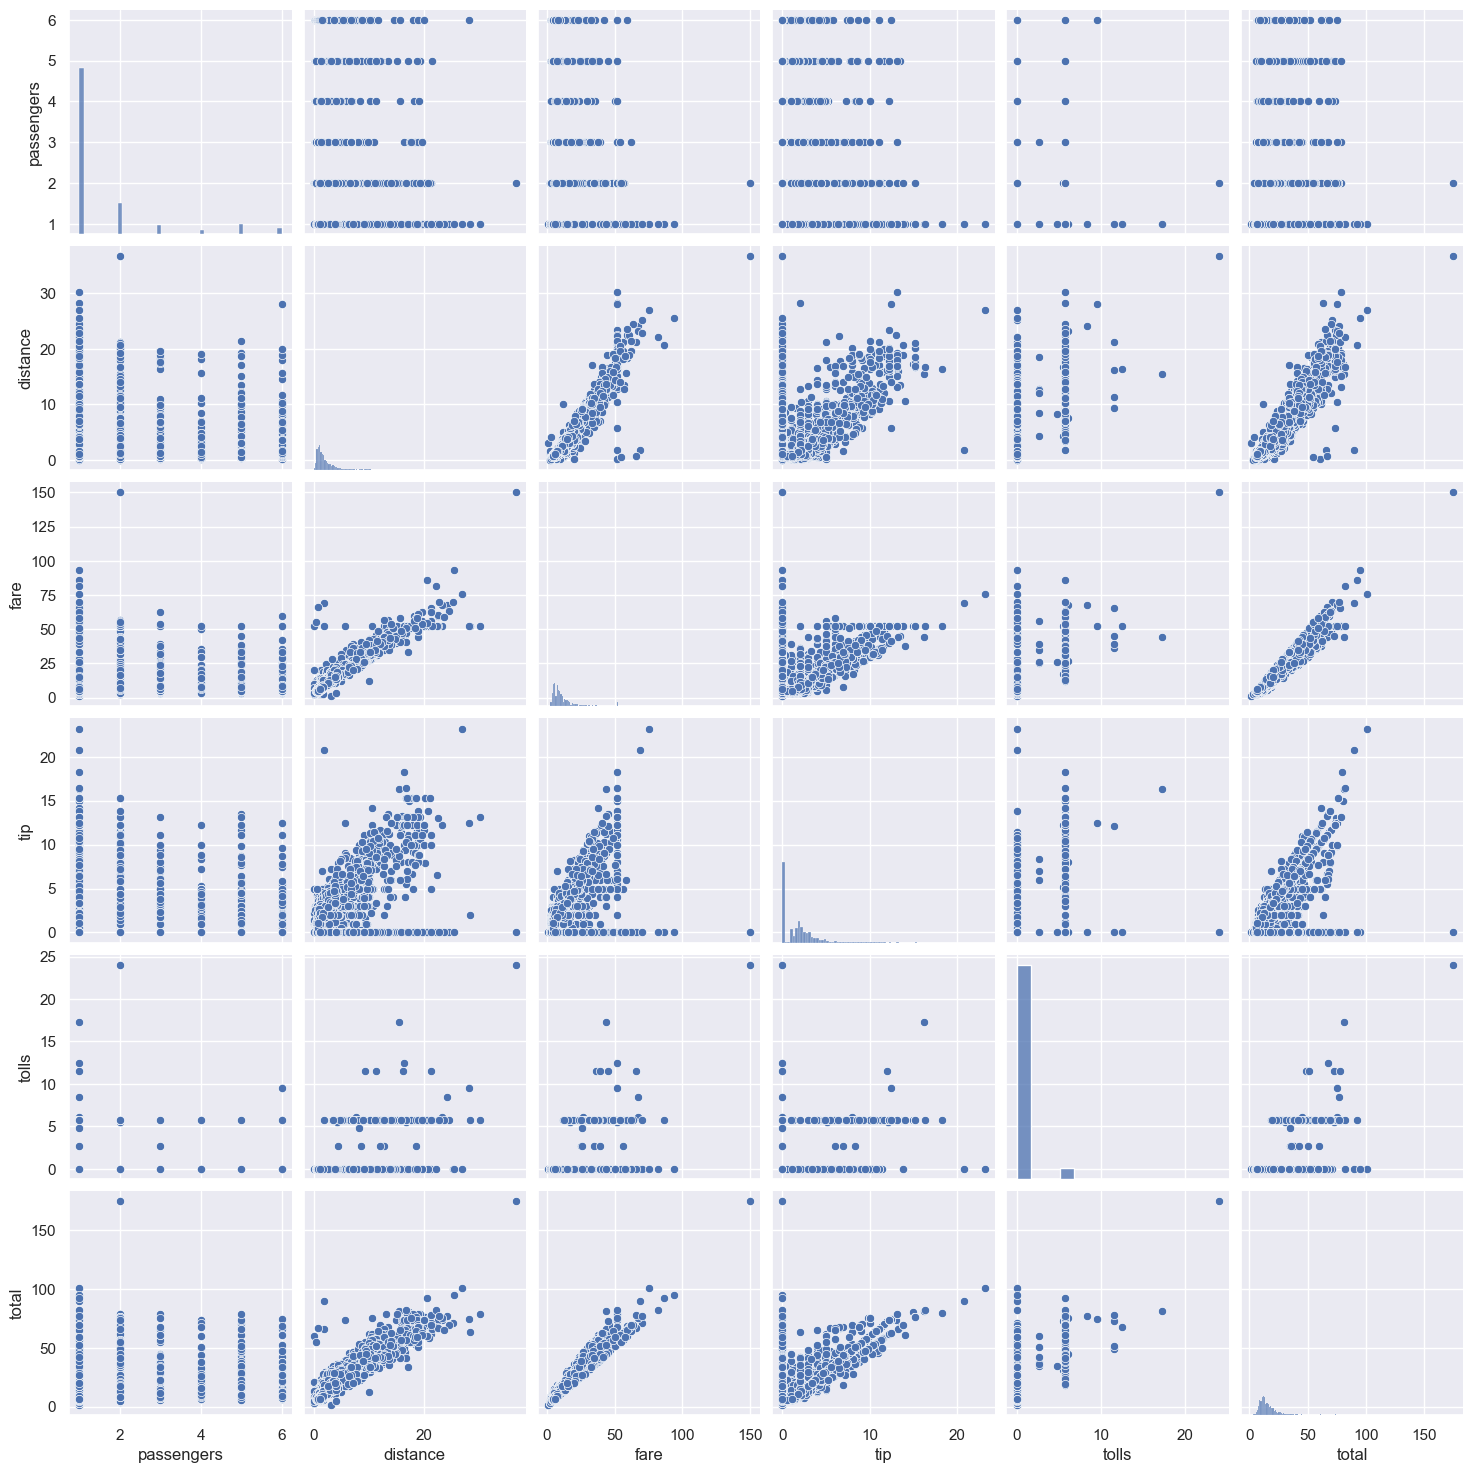

In [111]:
sns.pairplot(tripData[["passengers","distance", "fare", "tip", "tolls", "total"]])

Looking at the tips, there is a general trend with the relationship between tips, fares and distance. Fares are strongly correlated to the distance of the trip. The variations can be explained through the fare prices are dependent on a combination of distance and time. Tips generally increase with the distance traveled in a taxi ride, however there are still some passengers who tip 0$ on long trips.

When looking at the number of passengers vs distance traveled, you can see that some of the longer trips are with only single passengers. Unfortunately we cannot explain this very well. We speculate that its because group trips are better planned (business trips, holidays) and they are less likely to take a longer taxi ride. Single passengers may take impromptu long trips.

At first we thought that single passengers gave higher tips, however it's also single passengers that generally take longer rides. This means that the correlation between single passengers and higher tips are not true, but possibly tips are correlated with longer trips like explained earlier.

